In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the dataset
data = pd.read_csv(r'C:\Users\kousi\Downloads\eeg1.csv')


In [4]:
data.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL


In [7]:
# Checking for Missing Data
print(data.isnull().sum())

# Handling Missing Data
data = data.fillna(data.mean())


# mean_0_a    0
mean_1_a      0
mean_2_a      0
mean_3_a      0
mean_4_a      0
             ..
fft_746_b     0
fft_747_b     0
fft_748_b     0
fft_749_b     0
label         0
Length: 2549, dtype: int64


In [5]:
# Encoding Categorical Data
le = LabelEncoder()
data['label'] = le.fit_transform(data['label'])

In [6]:
data.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,0
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,1
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,2
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,2
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,1


In [8]:
# Feature Scaling and Normalizing Data
scaler = StandardScaler()
X = data.drop('label', axis=1)
X = scaler.fit_transform(X)
y = data['label']

In [9]:
# Splitting Data into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [10]:
# Perform PCA on X_train and X_test
pca = PCA(n_components=5)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [42]:
# Initializing the models
rfc = RandomForestClassifier(n_estimators=100, random_state=0)
dtc = DecisionTreeClassifier(random_state=0)
knn = KNeighborsClassifier()
svc = SVC(random_state=0)
lr = LogisticRegression(random_state=0)


In [43]:
# Training and Testing the models
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)

knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

C:\Users\kousi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\kousi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

In [13]:
# Evaluation of Models
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
accuracy_dtc = accuracy_score(y_test, y_pred_dtc)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

In [14]:
print("Random Forest Accuracy: {:.2f}%".format(accuracy_rfc * 100))
print("Decision Tree Accuracy: {:.2f}%".format(accuracy_dtc * 100))
print("KNN Accuracy: {:.2f}%".format(accuracy_knn * 100))
print("SVM Accuracy: {:.2f}%".format(accuracy_svc * 100))
print("Logistic Regression Accuracy: {:.2f}%".format(accuracy_lr * 100))


Random Forest Accuracy: 95.32%
Decision Tree Accuracy: 93.21%
KNN Accuracy: 96.02%
SVM Accuracy: 91.10%
Logistic Regression Accuracy: 86.42%


In [15]:
from sklearn.metrics import classification_report

# Evaluation of Models
y_pred_rfc = rfc.predict(X_test)
y_pred_dtc = dtc.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_lr = lr.predict(X_test)



C:\Users\kousi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [19]:
# Classification report
label = ['No Stress', 'Medium Stress', 'High Stress']

print("Random Forest:")
print(classification_report(y_test, y_pred_rfc, target_names=label))


Random Forest:
               precision    recall  f1-score   support

    No Stress       0.91      0.98      0.94       132
Medium Stress       0.98      0.99      0.99       147
  High Stress       0.97      0.89      0.93       148

     accuracy                           0.95       427
    macro avg       0.95      0.95      0.95       427
 weighted avg       0.95      0.95      0.95       427



In [20]:
print("Decision Tree:")
print(classification_report(y_test, y_pred_dtc, target_names=label))


Decision Tree:
               precision    recall  f1-score   support

    No Stress       0.92      0.93      0.93       132
Medium Stress       0.96      0.97      0.96       147
  High Stress       0.91      0.90      0.90       148

     accuracy                           0.93       427
    macro avg       0.93      0.93      0.93       427
 weighted avg       0.93      0.93      0.93       427



In [21]:
print("KNN:")
print(classification_report(y_test, y_pred_knn, target_names=label))


KNN:
               precision    recall  f1-score   support

    No Stress       0.92      0.99      0.96       132
Medium Stress       0.97      0.99      0.98       147
  High Stress       0.99      0.90      0.94       148

     accuracy                           0.96       427
    macro avg       0.96      0.96      0.96       427
 weighted avg       0.96      0.96      0.96       427



In [22]:
print("SVM:")
print(classification_report(y_test, y_pred_svc, target_names=label))


SVM:
               precision    recall  f1-score   support

    No Stress       0.86      0.97      0.91       132
Medium Stress       0.93      0.99      0.96       147
  High Stress       0.95      0.78      0.86       148

     accuracy                           0.91       427
    macro avg       0.91      0.91      0.91       427
 weighted avg       0.92      0.91      0.91       427



In [23]:
print("Logistic Regression:")
print(classification_report(y_test, y_pred_lr, target_names=label))

Logistic Regression:
               precision    recall  f1-score   support

    No Stress       0.84      0.85      0.85       132
Medium Stress       0.90      0.99      0.94       147
  High Stress       0.84      0.76      0.80       148

     accuracy                           0.86       427
    macro avg       0.86      0.86      0.86       427
 weighted avg       0.86      0.86      0.86       427



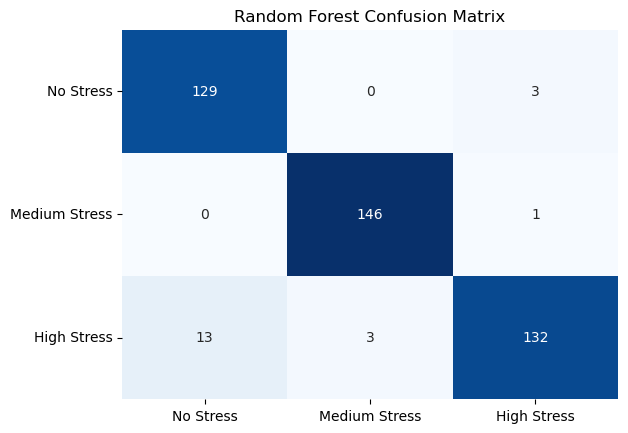

In [29]:
# Random Forest
cm_rfc = confusion_matrix(y_test, y_pred_rfc)
sns.heatmap(cm_rfc, annot=True, cmap='Blues', cbar=False, fmt='g')
plt.title('Random Forest Confusion Matrix')
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=labels)
plt.yticks(ticks=[0.5, 1.5, 2.5], labels=labels, rotation=0)
plt.show()




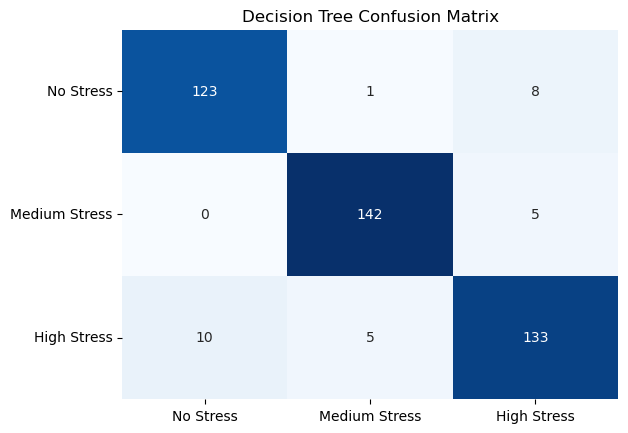

In [30]:
# Decision Tree
cm_dtc = confusion_matrix(y_test, y_pred_dtc)
sns.heatmap(cm_dtc, annot=True, cmap='Blues', cbar=False, fmt='g')
plt.title('Decision Tree Confusion Matrix')
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=labels)
plt.yticks(ticks=[0.5, 1.5, 2.5], labels=labels, rotation=0)
plt.show()



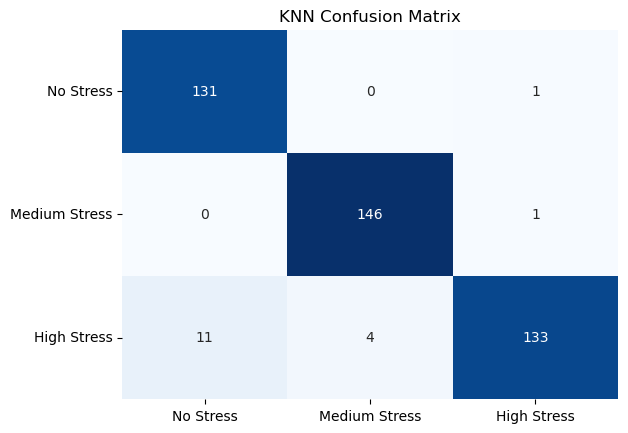

In [31]:
# KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, cmap='Blues', cbar=False, fmt='g')
plt.title('KNN Confusion Matrix')
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=labels)
plt.yticks(ticks=[0.5, 1.5, 2.5], labels=labels, rotation=0)
plt.show()



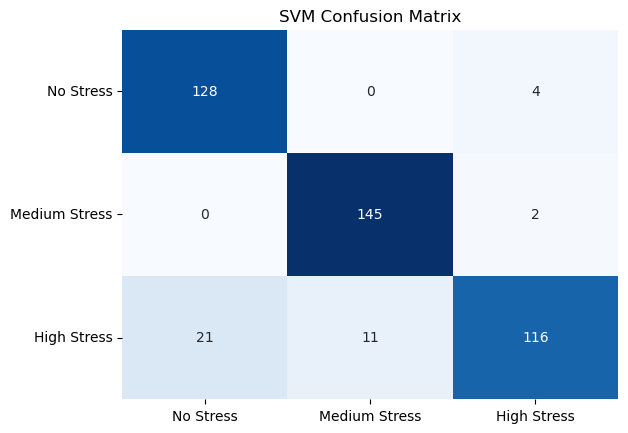

In [32]:
# SVM
cm_svc = confusion_matrix(y_test, y_pred_svc)
sns.heatmap(cm_svc, annot=True, cmap='Blues', cbar=False, fmt='g')
plt.title('SVM Confusion Matrix')
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=labels)
plt.yticks(ticks=[0.5, 1.5, 2.5], labels=labels, rotation=0)
plt.show()



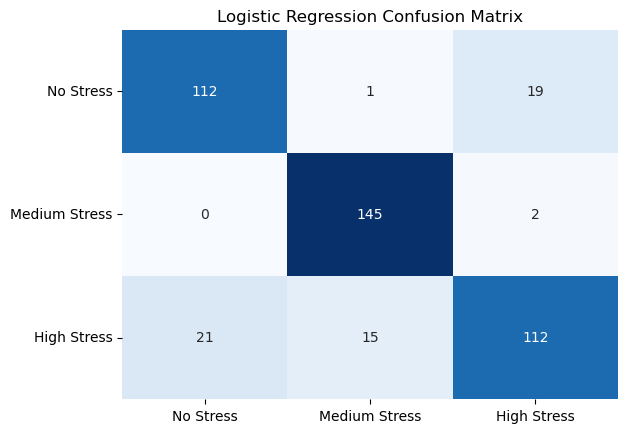

In [33]:
# Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, cmap='Blues', cbar=False, fmt='g')
plt.title('Logistic Regression Confusion Matrix')
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=labels)
plt.yticks(ticks=[0.5, 1.5, 2.5], labels=labels, rotation=0)
plt.show()

In [34]:
print("----------------------")
print("------Random Forest------")

rf = RandomForestClassifier(n_estimators=100, random_state=42) 
rf.fit(X_train, y_train) 
rfy_pred = rf.predict(X_test)

print()
print("------Classification Report------")
print(classification_report(rfy_pred, y_test))

print()
print("------Accuracy------")
print("Random Forest Accuracy:", rf.score(X_test, y_test))
rfc = round(accuracy_score(rfy_pred, y_test) * 100)

----------------------
------Random Forest------

------Classification Report------
              precision    recall  f1-score   support

           0       0.98      0.91      0.94       142
           1       1.00      0.97      0.99       151
           2       0.89      0.98      0.93       134

    accuracy                           0.95       427
   macro avg       0.95      0.95      0.95       427
weighted avg       0.96      0.95      0.95       427


------Accuracy------
Random Forest Accuracy: 0.9531615925058547


In [36]:
print("----------------------")
print("------KNN------")

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_y_pred = knn.predict(X_test)

print()
print("------Classification Report------")
print(classification_report(knn_y_pred, y_test))

print()
print("------Accuracy------")
print("KNN Accuracy:", knn.score(X_test, y_test))
knn_acc = round(accuracy_score(knn_y_pred, y_test) * 100)


----------------------
------KNN------

------Classification Report------
              precision    recall  f1-score   support

           0       0.99      0.92      0.96       142
           1       0.99      0.97      0.98       150
           2       0.90      0.99      0.94       135

    accuracy                           0.96       427
   macro avg       0.96      0.96      0.96       427
weighted avg       0.96      0.96      0.96       427


------Accuracy------
KNN Accuracy: 0.9601873536299765


C:\Users\kousi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\kousi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [44]:
# Creating a dictionary of models
models = {'Random Forest': rfc, 'Decision Tree': dtc, 'KNN': knn, 'SVM': svc, 'Logistic Regression': lr}

# Evaluating models using cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5)
    print(f'{name}: Mean accuracy = {np.mean(scores):.2f} (std = {np.std(scores):.2f})')

Random Forest: Mean accuracy = 0.99 (std = 0.01)
Decision Tree: Mean accuracy = 0.96 (std = 0.01)


C:\Users\kousi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\kousi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

KNN: Mean accuracy = 0.94 (std = 0.01)
SVM: Mean accuracy = 0.95 (std = 0.01)


C:\Users\kousi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\kousi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Logistic Regression: Mean accuracy = 0.96 (std = 0.00)


C:\Users\kousi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)
rfc_y_pred = rfc.predict(X_test)

print("Confusion Matrix - Random Forest")
print(confusion_matrix(rfc_y_pred, y_test))


Confusion Matrix - Random Forest
[[129   0  13]
 [  0 147   4]
 [  3   0 131]]


In [46]:
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)
dtc_y_pred = dtc.predict(X_test)

print("Confusion Matrix - Decision Tree")
print(confusion_matrix(dtc_y_pred, y_test))


Confusion Matrix - Decision Tree
[[123   0  11]
 [  1 142   5]
 [  8   5 132]]


In [47]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_y_pred = knn.predict(X_test)

print("Confusion Matrix - K-Nearest Neighbors")
print(confusion_matrix(knn_y_pred, y_test))


Confusion Matrix - K-Nearest Neighbors
[[131   0  11]
 [  0 146   4]
 [  1   1 133]]


C:\Users\kousi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [48]:
svc = SVC(random_state=42)
svc.fit(X_train, y_train)
svc_y_pred = svc.predict(X_test)

print("Confusion Matrix - Support Vector Machine")
print(confusion_matrix(svc_y_pred, y_test))


Confusion Matrix - Support Vector Machine
[[128   0  21]
 [  0 145  11]
 [  4   2 116]]


In [49]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
lr_y_pred = lr.predict(X_test)

print("Confusion Matrix - Logistic Regression")
print(confusion_matrix(lr_y_pred, y_test))


Confusion Matrix - Logistic Regression
[[112   0  21]
 [  1 145  15]
 [ 19   2 112]]


C:\Users\kousi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [50]:
import pickle
from sklearn.ensemble import RandomForestClassifier

In [55]:


with open('random_forest.pkl', 'wb') as file:
    pickle.dump(rfc, file)
